<a href="https://colab.research.google.com/github/greiceh/previs-o-ipca-sub-itens/blob/main/Regress%C3%A3o_linear_infla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inflação por SubItem em 24 meses


In [1]:
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# caminho pro IPCA 2021 01 por exmemplo: /content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202101Subitem.xls

In [5]:
ipca_2021_01 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202101Subitem.xls', header = 4, index_col = 0).dropna()

In [6]:
ipca_2021_01

,RJ,POA,BH,REC,SP,DF,BEL,FOR,SAL,CUR,GOI,VIT,CG,RB,SL,AJU,NACIONAL
,,,,,,,,,,,,,,,,,
ÍNDICE GERAL,0.18,0.25,0.33,0.5,0.24,0.05,-0.03,0.36,0.26,0.44,-0.17,0.44,0.53,0.44,0.29,0.39,0.25
ALIMENTAÇÃO E BEBIDAS,1.18,0.65,1.29,1.55,0.79,1.22,0.95,1.21,1.08,1.53,0.5,0.9,0.63,2,1.05,1.61,1.02
ALIMENTAÇÃO NO DOMICÍLIO,1.36,0.46,1.48,2.04,0.8,1.44,1.07,1.25,0.85,1.62,0.29,0.7,0.65,2.19,0.98,1.87,1.06
"CEREAIS, LEGUMINOSAS E OLEAGINOSAS",0.48,2.56,0.93,1.73,0.56,1.05,-0.6,2.1,-0.14,-0.87,-0.06,-0.58,0.51,0.59,1.08,0.93,0.64
ARROZ,-0.57,1.66,0.39,0.4,0.36,0.8,-0.98,1.93,0.24,-1.43,0.03,-1.91,0.62,0.2,0.93,-0.06,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TV POR ASSINATURA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
ACESSO À INTERNET,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
APARELHO TELEFÔNICO,-0.88,1.25,-0.02,0.71,1.28,-1.05,1.67,-0.13,-1.33,-0.54,-0.75,-1.31,-1.17,-0.32,-2.27,-0.13,0.12


In [7]:
ipca_2021_01_new = ipca_2021_01[['POA']]

In [8]:
ipca_2021_01_new.index

Index([' ÍNDICE GERAL', ' ALIMENTAÇÃO E BEBIDAS', ' ALIMENTAÇÃO NO DOMICÍLIO',
       ' CEREAIS, LEGUMINOSAS E OLEAGINOSAS', ' ARROZ', ' FEIJÃO-MULATINHO',
       ' FEIJÃO-PRETO', ' FEIJÃO-MACÁÇAR (FRADINHO)',
       ' FEIJÃO-CARIOCA (RAJADO)', ' MILHO (EM GRÃO)',
       ...
       ' COMUNICAÇÃO', ' COMUNICAÇÃO', ' CORREIO', ' PLANO DE TELEFONIA FIXA',
       ' PLANO DE TELEFONIA MÓVEL', ' TV POR ASSINATURA', ' ACESSO À INTERNET',
       ' APARELHO TELEFÔNICO', ' SERVIÇOS DE STREAMING',
       ' COMBO DE TELEFONIA, INTERNET E TV POR ASSINATURA'],
      dtype='object', name=' ', length=457)

In [9]:
ipca_2021_01_new.loc[ipca_2021_01_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]
ipca_2021_01_new = ipca_2021_01_new.rename(columns={"POA":"01_21"})

In [10]:
ipca_2021_01_new.head()

,01_21
,
ÍNDICE GERAL,0.25
ALIMENTAÇÃO E BEBIDAS,0.65
ALIMENTAÇÃO NO DOMICÍLIO,0.46
"CEREAIS, LEGUMINOSAS E OLEAGINOSAS",2.56
ARROZ,1.66


In [11]:
ipca_2021_01 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202101Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_01_new = ipca_2021_01[['POA']]
ipca_2021_01_new = ipca_2021_01_new.rename(columns={"POA":"01_21"})
ipca_2021_01_new = ipca_2021_01_new.loc[ipca_2021_01_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [12]:
ipca_2021_02 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202102Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_02_new = ipca_2021_02[['POA']]
ipca_2021_02_new = ipca_2021_02_new.rename(columns={"POA":"02_21"})
ipca_2021_02_new = ipca_2021_02_new.loc[ipca_2021_02_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [13]:
ipca_2021_03 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202103Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_03_new = ipca_2021_03[['POA']]
ipca_2021_03_new = ipca_2021_03_new.rename(columns={"POA":"03_21"})
ipca_2021_03_new = ipca_2021_03_new.loc[ipca_2021_03_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [14]:
ipca_2021_04 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202104Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_04_new = ipca_2021_04[['POA']]
ipca_2021_04_new = ipca_2021_04_new.rename(columns={"POA":"04_21"})
ipca_2021_04_new = ipca_2021_04_new.loc[ipca_2021_04_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [15]:
ipca_2021_05 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202105Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_05_new = ipca_2021_05[['POA']]
ipca_2021_05_new = ipca_2021_05_new.rename(columns={"POA":"05_21"})
ipca_2021_05_new = ipca_2021_05_new.loc[ipca_2021_05_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [16]:
ipca_2021_06 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202106Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_06_new = ipca_2021_06[['POA']]
ipca_2021_06_new = ipca_2021_06_new.rename(columns={"POA":"06_21"})
ipca_2021_06_new = ipca_2021_06_new.loc[ipca_2021_06_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [17]:
ipca_2021_07 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202107Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_07_new = ipca_2021_07[['POA']]
ipca_2021_07_new = ipca_2021_07_new.rename(columns={"POA":"07_21"})
ipca_2021_07_new = ipca_2021_07_new.loc[ipca_2021_07_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [18]:
ipca_2021_08 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202108Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_08_new = ipca_2021_08[['POA']]
ipca_2021_08_new = ipca_2021_08_new.rename(columns={"POA":"08_21"})
ipca_2021_08_new = ipca_2021_08_new.loc[ipca_2021_08_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [19]:
ipca_2021_09 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202109Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_09_new = ipca_2021_09[['POA']]
ipca_2021_09_new = ipca_2021_09_new.rename(columns={"POA":"09_21"})
ipca_2021_09_new = ipca_2021_09_new.loc[ipca_2021_09_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [20]:
ipca_2021_10 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202110Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_10_new = ipca_2021_10[['POA']]
ipca_2021_10_new = ipca_2021_10_new.rename(columns={"POA":"10_21"})
ipca_2021_10_new = ipca_2021_10_new.loc[ipca_2021_10_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [21]:
ipca_2021_11 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202111Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_11_new = ipca_2021_11[['POA']]
ipca_2021_11_new = ipca_2021_11_new.rename(columns={"POA":"11_21"})
ipca_2021_11_new = ipca_2021_11_new.loc[ipca_2021_11_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [22]:
ipca_2021_12 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202112Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2021_12_new = ipca_2021_12[['POA']]
ipca_2021_12_new = ipca_2021_12_new.rename(columns={"POA":"12_21"})
ipca_2021_12_new = ipca_2021_12_new.loc[ipca_2021_12_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [23]:
ipca_2022_01 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202201Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_01_new = ipca_2022_01[['POA']]
ipca_2022_01_new = ipca_2022_01_new.rename(columns={"POA":"01_22"})
ipca_2022_01_new = ipca_2022_01_new.loc[ipca_2022_01_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [24]:
ipca_2022_02 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202202Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_02_new = ipca_2022_02[['POA']]
ipca_2022_02_new = ipca_2022_02_new.rename(columns={"POA":"02_22"})
ipca_2022_02_new = ipca_2022_02_new.loc[ipca_2022_02_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [25]:
ipca_2022_03 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202203Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_03_new = ipca_2022_03[['POA']]
ipca_2022_03_new = ipca_2022_03_new.rename(columns={"POA":"03_22"})
ipca_2022_03_new = ipca_2022_03_new.loc[ipca_2022_03_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [26]:
ipca_2022_04 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202204Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_04_new = ipca_2022_04[['POA']]
ipca_2022_04_new = ipca_2022_04_new.rename(columns={"POA":"04_22"})
ipca_2022_04_new = ipca_2022_04_new.loc[ipca_2022_04_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [27]:
ipca_2022_05 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202205Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_05_new = ipca_2022_05[['POA']]
ipca_2022_05_new = ipca_2022_05_new.rename(columns={"POA":"05_22"})
ipca_2022_05_new = ipca_2022_05_new.loc[ipca_2022_05_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [28]:
ipca_2022_06 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202206Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_06_new = ipca_2022_06[['POA']]
ipca_2022_06_new = ipca_2022_06_new.rename(columns={"POA":"06_22"})
ipca_2022_06_new = ipca_2022_06_new.loc[ipca_2022_06_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [29]:
ipca_2022_07 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202207Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_07_new = ipca_2022_07[['POA']]
ipca_2022_07_new = ipca_2022_07_new.rename(columns={"POA":"07_22"})
ipca_2022_07_new = ipca_2022_07_new.loc[ipca_2022_07_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [30]:
ipca_2022_08 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202208Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_08_new = ipca_2022_08[['POA']]
ipca_2022_08_new = ipca_2022_08_new.rename(columns={"POA":"08_22"})
ipca_2022_08_new = ipca_2022_08_new.loc[ipca_2022_08_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [31]:
ipca_2022_09 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202209Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_09_new = ipca_2022_09[['POA']]
ipca_2022_09_new = ipca_2022_09_new.rename(columns={"POA":"09_22"})
ipca_2022_09_new = ipca_2022_09_new.loc[ipca_2022_09_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [32]:
ipca_2022_10 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202210Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_10_new = ipca_2022_10[['POA']]
ipca_2022_10_new = ipca_2022_10_new.rename(columns={"POA":"10_22"})
ipca_2022_10_new = ipca_2022_10_new.loc[ipca_2022_10_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [33]:
ipca_2022_11 = pd.read_excel('/content/drive/MyDrive/Cadeiras/2022 2/Tópicos Avançados em Marketing II/Projeto em Grupo/ipca_202211Subitem.xls', header = 4, index_col = 0).dropna()
ipca_2022_11_new = ipca_2022_11[['POA']]
ipca_2022_11_new = ipca_2022_11_new.rename(columns={"POA":"11_22"})
ipca_2022_11_new = ipca_2022_11_new.loc[ipca_2022_11_new.index.isin([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS',' FARINHAS, FÉCULAS E MASSAS', ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS', ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS', ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS', ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS', ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'  ])]

In [34]:
concate = pd.concat(
    [ipca_2021_01_new,ipca_2021_02_new
      ,ipca_2021_03_new,ipca_2021_04_new
     ,ipca_2021_05_new,ipca_2021_06_new
     ,ipca_2021_07_new,ipca_2021_08_new
     ,ipca_2021_09_new,ipca_2021_10_new
     ,ipca_2021_11_new,ipca_2021_12_new
     ,ipca_2022_01_new,ipca_2022_02_new
     ,ipca_2022_03_new,ipca_2022_04_new
     ,ipca_2022_05_new,ipca_2022_06_new
     ,ipca_2022_07_new,ipca_2022_08_new
     ,ipca_2022_09_new,ipca_2022_10_new
     ,ipca_2022_11_new
     ]
     ,axis=1)

pd.set_option('display.max_columns', None)
concate

#axis = 1 pra mostrar que é pra juntar para horizontal e nao vertical

,01_21,02_21,03_21,04_21,05_21,06_21,07_21,08_21,09_21,10_21,11_21,12_21,01_22,02_22,03_22,04_22,05_22,06_22,07_22,08_22,09_22,10_22,11_22
,,,,,,,,,,,,,,,,,,,,,,,
"CEREAIS, LEGUMINOSAS E OLEAGINOSAS",2.56,0.1,0.11,-0.22,0.44,-0.16,-1.28,-0.29,-3.04,-2.9,-1.02,-5.1,-3.8,1.64,2.48,3.68,1.39,0.05,-0.87,-1.73,-0.67,0.01,2.17
"FARINHAS, FÉCULAS E MASSAS",2.73,2.21,1.68,1.99,0.26,-0.13,-0.24,0.83,0.49,-0.21,-0.22,0.22,0.94,1.31,1.54,5.19,5.1,1.05,2.33,0.7,1.07,1.95,0.57
"TUBÉRCULOS, RAÍZES E LEGUMES",4.26,-1.07,-11.67,-5.3,5.26,-0.92,-5.67,10.58,1.74,6.69,4.29,-2.48,-5.38,13.34,19.79,8.82,1.49,-2.56,-11.51,-6.32,9.37,11.97,17.37
AÇÚCARES E DERIVADOS,1.1,0.85,0.8,1.79,1.19,0.99,-0.35,1.38,1.2,1,0.64,0.28,0.8,-0.93,-0.06,1.08,2.27,0.71,0.62,1.34,1.51,3.33,0.2
HORTALIÇAS E VERDURAS,4.71,6.4,4.67,-1.05,0.08,-4.14,-7.73,8.45,-2.74,0.36,1.94,0.21,14.56,24.16,14.85,2,-10.06,-6.05,0.55,-9.02,-4.48,-8.76,-8.86
FRUTAS,0.86,0.04,-1.36,-4.56,-6.15,-1.95,-0.4,2.18,-2.31,-1.84,2.23,6.08,5.54,6.77,13.13,-2.77,-0.9,1.04,6.04,-6.13,0.31,7.25,0.69
CARNES,-0.27,2.47,2.42,-0.01,3.57,1.6,0.42,2.49,0.55,-1.15,-2.16,1.48,1.75,-0.34,1.88,1.59,1.11,-0.03,-0.39,0.24,-0.76,0.46,-0.97
PESCADOS,-0.21,1.72,-1.9,0.87,2.34,0.63,0.94,-1.1,-0.44,-0.94,0.83,0.99,0.47,0.47,1.46,1.11,-0.76,0.26,0.81,-0.91,0.18,1.74,0.37
CARNES E PEIXES INDUSTRIALIZADOS,0.51,2.79,-1.88,0.31,0.6,2.48,1.1,1.96,0.26,-1.05,1.47,-0.5,0.24,-0.05,-0.7,2.07,2.33,1.73,0.43,0.04,0.72,2.29,2.59


In [35]:
concate_new = concate.T
concate_new

,"CEREAIS, LEGUMINOSAS E OLEAGINOSAS","FARINHAS, FÉCULAS E MASSAS","TUBÉRCULOS, RAÍZES E LEGUMES",AÇÚCARES E DERIVADOS,HORTALIÇAS E VERDURAS,FRUTAS,CARNES,PESCADOS,CARNES E PEIXES INDUSTRIALIZADOS,AVES E OVOS,LEITES E DERIVADOS,PANIFICADOS,ÓLEOS E GORDURAS,BEBIDAS E INFUSÕES,ENLATADOS E CONSERVAS,SAL E CONDIMENTOS
01_21,2.56,2.73,4.26,1.1,4.71,0.86,-0.27,-0.21,0.51,-1.25,-1.38,0.45,0.38,0.23,1.24,1.55
02_21,0.1,2.21,-1.07,0.85,6.4,0.04,2.47,1.72,2.79,-0.42,1.57,1.27,0.28,0.72,0.86,1.44
03_21,0.11,1.68,-11.67,0.8,4.67,-1.36,2.42,-1.9,-1.88,2.41,-1.11,1.63,0.2,0.86,0.87,-0.33
04_21,-0.22,1.99,-5.3,1.79,-1.05,-4.56,-0.01,0.87,0.31,4.24,2.09,2.79,1.56,0.81,-0.9,1.23
05_21,0.44,0.26,5.26,1.19,0.08,-6.15,3.57,2.34,0.6,0.51,-0.01,0.86,1.26,0.11,1.2,-0.21
06_21,-0.16,-0.13,-0.92,0.99,-4.14,-1.95,1.6,0.63,2.48,1.72,3.22,0.55,-0.49,0.91,0.7,0.86
07_21,-1.28,-0.24,-5.67,-0.35,-7.73,-0.4,0.42,0.94,1.1,-0.4,5.09,0.5,0.55,-1.42,1.15,-0.07
08_21,-0.29,0.83,10.58,1.38,8.45,2.18,2.49,-1.1,1.96,1.24,-1.07,0.47,-1.41,0.89,-0.19,1.07
09_21,-3.04,0.49,1.74,1.2,-2.74,-2.31,0.55,-0.44,0.26,2.21,0.96,0.19,-0.7,-0.23,0.25,-0.05
10_21,-2.9,-0.21,6.69,1,0.36,-1.84,-1.15,-0.94,-1.05,1.55,-1.04,-0.05,1.93,-0.02,0.2,0.35


#Erro

In [36]:
concate.describe()

,01_21,02_21,03_21,04_21,05_21,06_21,07_21,08_21,09_21,10_21,11_21,12_21,01_22,02_22,03_22,04_22,05_22,06_22,07_22,08_22,09_22,10_22,11_22
count,16.00,16.0,16.00,16.00,16.00,16.00,16.0,16.00,16.00,16.0,16.00,16.0,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
unique,16.00,16.0,16.00,16.00,16.00,16.00,15.0,16.00,16.00,16.0,15.00,16.0,15.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
top,2.56,0.1,0.11,-0.22,0.44,-0.16,-0.4,-0.29,-3.04,-2.9,0.79,-5.1,0.24,1.64,2.48,3.68,1.39,0.05,-0.87,-1.73,-0.67,0.01,2.17
freq,1.00,1.0,1.00,1.00,1.00,1.00,2.0,1.00,1.00,1.0,2.00,1.0,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [37]:
concate_new.describe()

,"CEREAIS, LEGUMINOSAS E OLEAGINOSAS","FARINHAS, FÉCULAS E MASSAS","TUBÉRCULOS, RAÍZES E LEGUMES",AÇÚCARES E DERIVADOS,HORTALIÇAS E VERDURAS,FRUTAS,CARNES,PESCADOS,CARNES E PEIXES INDUSTRIALIZADOS,AVES E OVOS,LEITES E DERIVADOS,PANIFICADOS,ÓLEOS E GORDURAS,BEBIDAS E INFUSÕES,ENLATADOS E CONSERVAS,SAL E CONDIMENTOS
count,23.00,23.00,23.00,23.0,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00
unique,23.00,23.00,23.00,22.0,23.00,23.00,23.00,22.00,23.00,23.00,22.00,23.00,23.00,23.00,22.00,22.00
top,2.56,2.73,4.26,0.8,4.71,0.86,-0.27,0.47,0.51,-1.25,-0.01,0.45,0.38,0.23,0.79,0.88
freq,1.00,1.00,1.00,2.0,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00


In [38]:
concate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries,  CEREAIS, LEGUMINOSAS E OLEAGINOSAS to  SAL E CONDIMENTOS
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   01_21   16 non-null     object
 1   02_21   16 non-null     object
 2   03_21   16 non-null     object
 3   04_21   16 non-null     object
 4   05_21   16 non-null     object
 5   06_21   16 non-null     object
 6   07_21   16 non-null     object
 7   08_21   16 non-null     object
 8   09_21   16 non-null     object
 9   10_21   16 non-null     object
 10  11_21   16 non-null     object
 11  12_21   16 non-null     object
 12  01_22   16 non-null     object
 13  02_22   16 non-null     object
 14  03_22   16 non-null     object
 15  04_22   16 non-null     object
 16  05_22   16 non-null     object
 17  06_22   16 non-null     object
 18  07_22   16 non-null     object
 19  08_22   16 non-null     object
 20  09_22   16 non-null     object
 21  10_22   16 non-null

# Código

In [39]:
concate_analise = concate_new.astype(float)

In [40]:
concate_analise

,"CEREAIS, LEGUMINOSAS E OLEAGINOSAS","FARINHAS, FÉCULAS E MASSAS","TUBÉRCULOS, RAÍZES E LEGUMES",AÇÚCARES E DERIVADOS,HORTALIÇAS E VERDURAS,FRUTAS,CARNES,PESCADOS,CARNES E PEIXES INDUSTRIALIZADOS,AVES E OVOS,LEITES E DERIVADOS,PANIFICADOS,ÓLEOS E GORDURAS,BEBIDAS E INFUSÕES,ENLATADOS E CONSERVAS,SAL E CONDIMENTOS
01_21,2.56,2.73,4.26,1.10,4.71,0.86,-0.27,-0.21,0.51,-1.25,-1.38,0.45,0.38,0.23,1.24,1.55
02_21,0.10,2.21,-1.07,0.85,6.40,0.04,2.47,1.72,2.79,-0.42,1.57,1.27,0.28,0.72,0.86,1.44
03_21,0.11,1.68,-11.67,0.80,4.67,-1.36,2.42,-1.90,-1.88,2.41,-1.11,1.63,0.20,0.86,0.87,-0.33
04_21,-0.22,1.99,-5.30,1.79,-1.05,-4.56,-0.01,0.87,0.31,4.24,2.09,2.79,1.56,0.81,-0.90,1.23
05_21,0.44,0.26,5.26,1.19,0.08,-6.15,3.57,2.34,0.60,0.51,-0.01,0.86,1.26,0.11,1.20,-0.21
06_21,-0.16,-0.13,-0.92,0.99,-4.14,-1.95,1.60,0.63,2.48,1.72,3.22,0.55,-0.49,0.91,0.70,0.86
07_21,-1.28,-0.24,-5.67,-0.35,-7.73,-0.40,0.42,0.94,1.10,-0.40,5.09,0.50,0.55,-1.42,1.15,-0.07
08_21,-0.29,0.83,10.58,1.38,8.45,2.18,2.49,-1.10,1.96,1.24,-1.07,0.47,-1.41,0.89,-0.19,1.07
09_21,-3.04,0.49,1.74,1.20,-2.74,-2.31,0.55,-0.44,0.26,2.21,0.96,0.19,-0.70,-0.23,0.25,-0.05
10_21,-2.90,-0.21,6.69,1.00,0.36,-1.84,-1.15,-0.94,-1.05,1.55,-1.04,-0.05,1.93,-0.02,0.20,0.35


In [41]:
concate_analise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 01_21 to 11_22
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0    CEREAIS, LEGUMINOSAS E OLEAGINOSAS  23 non-null     float64
 1    FARINHAS, FÉCULAS E MASSAS          23 non-null     float64
 2    TUBÉRCULOS, RAÍZES E LEGUMES        23 non-null     float64
 3    AÇÚCARES E DERIVADOS                23 non-null     float64
 4    HORTALIÇAS E VERDURAS               23 non-null     float64
 5    FRUTAS                              23 non-null     float64
 6    CARNES                              23 non-null     float64
 7    PESCADOS                            23 non-null     float64
 8    CARNES E PEIXES INDUSTRIALIZADOS    23 non-null     float64
 9    AVES E OVOS                         23 non-null     float64
 10   LEITES E DERIVADOS                  23 non-null     float64
 11   PANIFICADOS                    

In [42]:
concate_analise.columns

Index([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS', ' FARINHAS, FÉCULAS E MASSAS',
       ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS',
       ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS',
       ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS',
       ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS',
       ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'],
      dtype='object', name=' ')

In [43]:
concate_analise.describe()

,"CEREAIS, LEGUMINOSAS E OLEAGINOSAS","FARINHAS, FÉCULAS E MASSAS","TUBÉRCULOS, RAÍZES E LEGUMES",AÇÚCARES E DERIVADOS,HORTALIÇAS E VERDURAS,FRUTAS,CARNES,PESCADOS,CARNES E PEIXES INDUSTRIALIZADOS,AVES E OVOS,LEITES E DERIVADOS,PANIFICADOS,ÓLEOS E GORDURAS,BEBIDAS E INFUSÕES,ENLATADOS E CONSERVAS,SAL E CONDIMENTOS
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,-0.280435,1.363478,2.699565,0.945217,0.871739,1.034348,0.693478,0.388261,0.858261,1.196087,1.157826,1.099130,0.566522,0.589130,0.957826,1.070870
std,2.122645,1.473769,8.663456,0.866014,8.642710,4.679038,1.406884,1.038931,1.275459,1.581644,5.583454,0.929369,2.303305,0.617052,0.934014,1.104083
min,-5.100000,-0.240000,-11.670000,-0.930000,-10.060000,-6.150000,-2.160000,-1.900000,-1.880000,-1.250000,-9.310000,-1.040000,-5.630000,-1.420000,-0.900000,-0.590000
25%,-1.150000,0.375000,-3.930000,0.630000,-5.265000,-1.895000,-0.305000,-0.325000,0.140000,-0.120000,-1.350000,0.485000,-0.695000,0.325000,0.350000,0.150000
50%,-0.160000,1.050000,1.740000,0.990000,0.210000,0.310000,0.460000,0.470000,0.600000,1.520000,-0.010000,1.270000,0.380000,0.720000,0.870000,0.910000
75%,0.915000,1.970000,9.095000,1.270000,4.690000,3.885000,1.675000,0.965000,2.015000,2.120000,3.990000,1.645000,1.850000,0.960000,1.320000,1.605000
max,3.680000,5.190000,19.790000,3.330000,24.160000,13.130000,3.570000,2.340000,2.790000,4.290000,17.900000,3.060000,5.290000,1.410000,3.300000,3.740000


Text(0.5, 1.0, ' SAL E CONDIMENTOS')

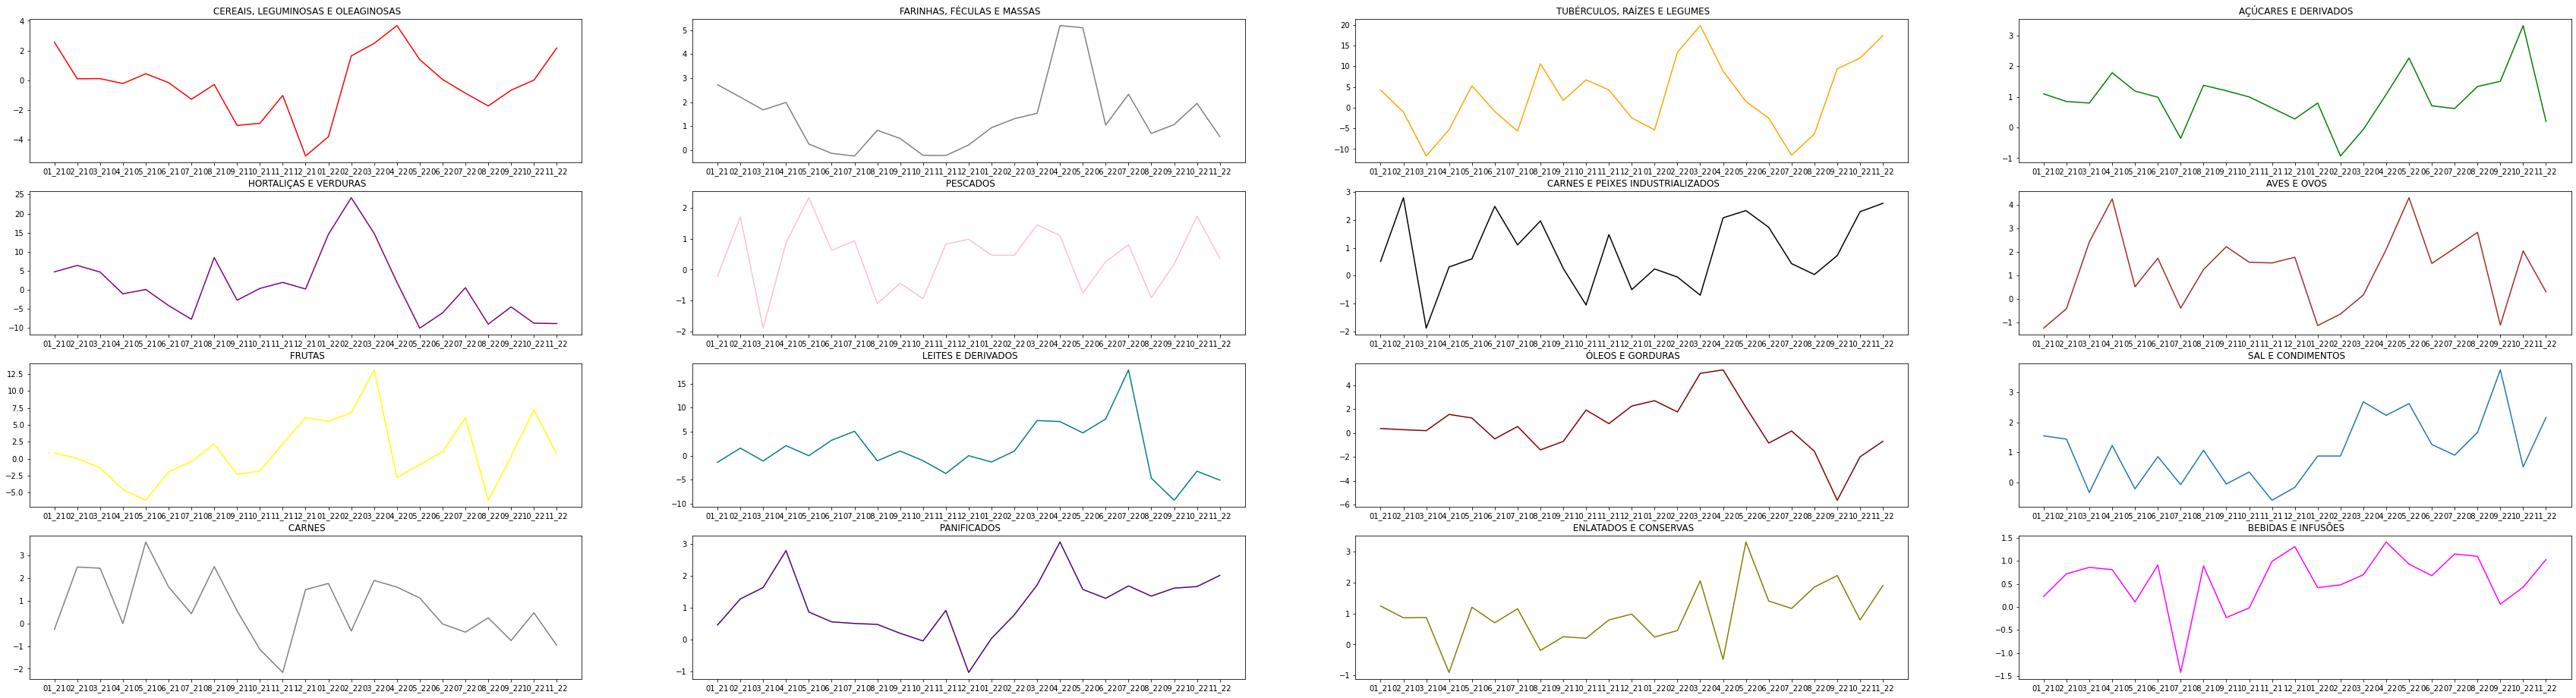

In [44]:
fig1, f1_axes = plt.subplots(ncols=4, nrows=4, figsize=(60,16))
f1_axes[0,0].plot(concate_analise[' CEREAIS, LEGUMINOSAS E OLEAGINOSAS'], color='red')
f1_axes[0,0].set_title(' CEREAIS, LEGUMINOSAS E OLEAGINOSAS')
f1_axes[0,1].plot(concate_analise[' FARINHAS, FÉCULAS E MASSAS'], color='gray')
f1_axes[0,1].set_title(' FARINHAS, FÉCULAS E MASSAS')
f1_axes[0,2].plot(concate_analise[' TUBÉRCULOS, RAÍZES E LEGUMES'], color='orange')
f1_axes[0,2].set_title(' TUBÉRCULOS, RAÍZES E LEGUMES')
f1_axes[0,3].plot(concate_analise[' AÇÚCARES E DERIVADOS'], color='green')
f1_axes[0,3].set_title(' AÇÚCARES E DERIVADOS')
f1_axes[1,0].plot(concate_analise[' HORTALIÇAS E VERDURAS'], color='purple')
f1_axes[1,0].set_title(' HORTALIÇAS E VERDURAS')
f1_axes[2,0].plot(concate_analise[' FRUTAS'], color='yellow')
f1_axes[2,0].set_title(' FRUTAS')
f1_axes[3,0].plot(concate_analise[' CARNES'], color='gray')
f1_axes[3,0].set_title(' CARNES')
f1_axes[1,1].plot(concate_analise[' PESCADOS'], color='pink')
f1_axes[1,1].set_title(' PESCADOS')
f1_axes[1,2].plot(concate_analise[' CARNES E PEIXES INDUSTRIALIZADOS'], color='black')
f1_axes[1,2].set_title(' CARNES E PEIXES INDUSTRIALIZADOS')
f1_axes[1,3].plot(concate_analise[' AVES E OVOS'], color='brown')
f1_axes[1,3].set_title(' AVES E OVOS')
f1_axes[2,1].plot(concate_analise[' LEITES E DERIVADOS'], color='Teal')
f1_axes[2,1].set_title(' LEITES E DERIVADOS')
f1_axes[3,1].plot(concate_analise[' PANIFICADOS'], color='Indigo')
f1_axes[3,1].set_title(' PANIFICADOS')
f1_axes[2,2].plot(concate_analise[' ÓLEOS E GORDURAS'], color='Maroon')
f1_axes[2,2].set_title(' ÓLEOS E GORDURAS')
f1_axes[3,3].plot(concate_analise[' BEBIDAS E INFUSÕES'], color='Magenta')
f1_axes[3,3].set_title(' BEBIDAS E INFUSÕES')
f1_axes[3,2].plot(concate_analise[' ENLATADOS E CONSERVAS'], color='Olive')
f1_axes[3,2].set_title(' ENLATADOS E CONSERVAS')
f1_axes[2,3].plot(concate_analise[' SAL E CONDIMENTOS'])
f1_axes[2,3].set_title(' SAL E CONDIMENTOS')

In [45]:
#Somar os valores de coluna para descobrir o total da inflação daquele alimento
cols_to_sum = [' CEREAIS, LEGUMINOSAS E OLEAGINOSAS', ' FARINHAS, FÉCULAS E MASSAS',
       ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS',
       ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS',
       ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS',
       ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS',
       ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS']

concate_analise[cols_to_sum].sum()


 
 CEREAIS, LEGUMINOSAS E OLEAGINOSAS    -6.45
 FARINHAS, FÉCULAS E MASSAS            31.36
 TUBÉRCULOS, RAÍZES E LEGUMES          62.09
 AÇÚCARES E DERIVADOS                  21.74
 HORTALIÇAS E VERDURAS                 20.05
 FRUTAS                                23.79
 CARNES                                15.95
 PESCADOS                               8.93
 CARNES E PEIXES INDUSTRIALIZADOS      19.74
 AVES E OVOS                           27.51
 LEITES E DERIVADOS                    26.63
 PANIFICADOS                           25.28
 ÓLEOS E GORDURAS                      13.03
 BEBIDAS E INFUSÕES                    13.55
 ENLATADOS E CONSERVAS                 22.03
 SAL E CONDIMENTOS                     24.63
dtype: float64

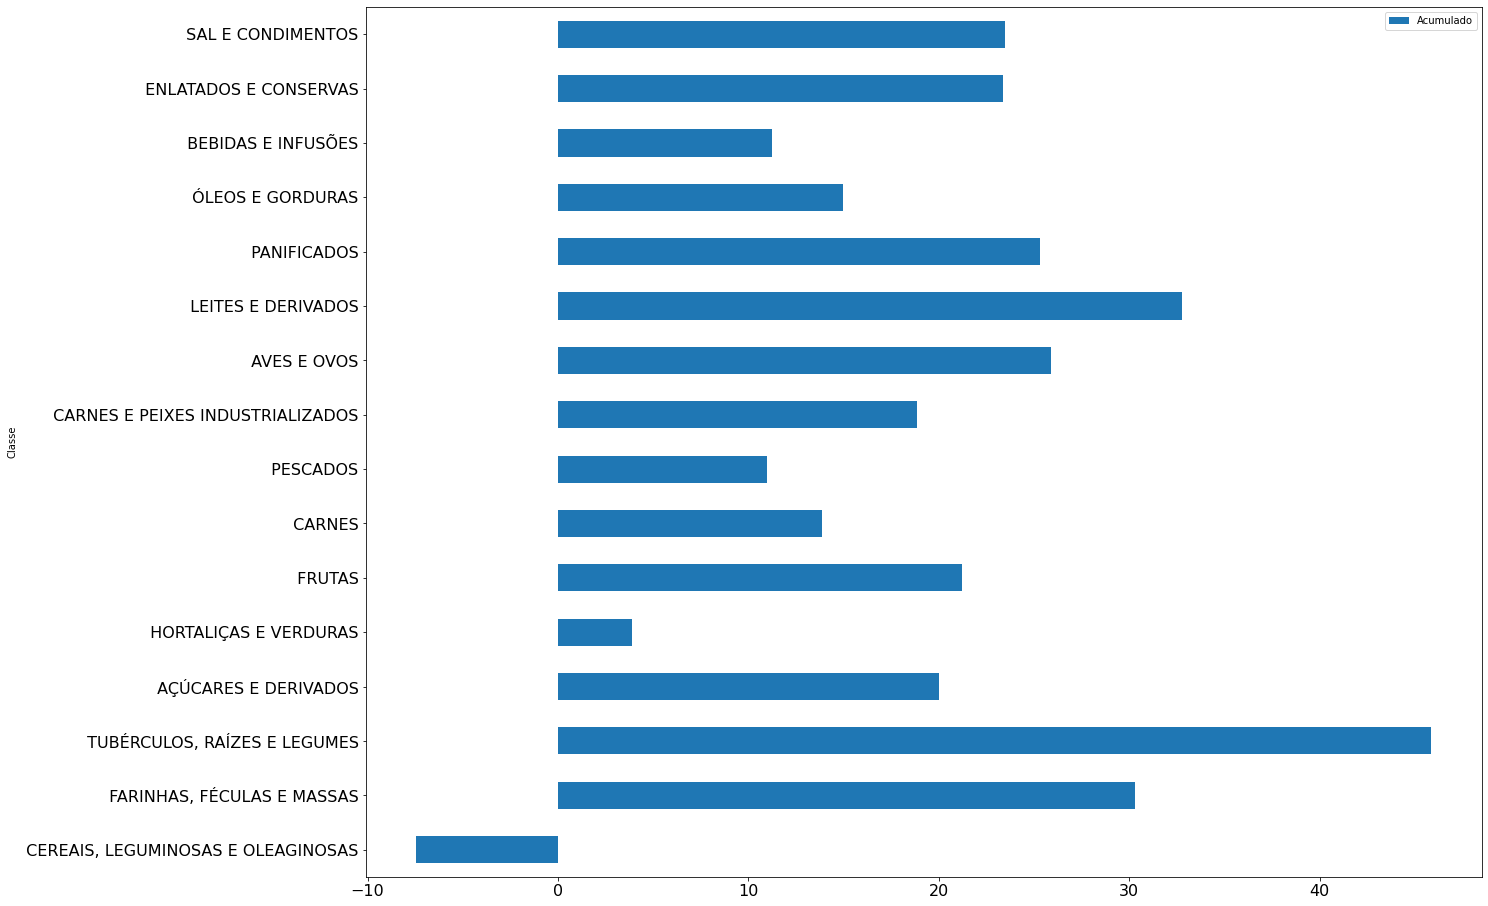

In [46]:
df = pd.DataFrame({'Classe': [' CEREAIS, LEGUMINOSAS E OLEAGINOSAS', ' FARINHAS, FÉCULAS E MASSAS',
       ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS',
       ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS',
       ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS',
       ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS',
       ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'],
       'Acumulado': [-7.44, 30.29, 45.84, 20.01, 3.87, 21.21, 13.88, 10.97, 18.88, 25.87, 32.79, 25.31, 14.99, 11.24, 23.37, 23.49] })
acumulado = df.plot.barh(x='Classe', y='Acumulado',figsize=(20,16), fontsize=16) 


In [47]:
concate_t = concate.astype(float)
concate


,01_21,02_21,03_21,04_21,05_21,06_21,07_21,08_21,09_21,10_21,11_21,12_21,01_22,02_22,03_22,04_22,05_22,06_22,07_22,08_22,09_22,10_22,11_22
,,,,,,,,,,,,,,,,,,,,,,,
"CEREAIS, LEGUMINOSAS E OLEAGINOSAS",2.56,0.1,0.11,-0.22,0.44,-0.16,-1.28,-0.29,-3.04,-2.9,-1.02,-5.1,-3.8,1.64,2.48,3.68,1.39,0.05,-0.87,-1.73,-0.67,0.01,2.17
"FARINHAS, FÉCULAS E MASSAS",2.73,2.21,1.68,1.99,0.26,-0.13,-0.24,0.83,0.49,-0.21,-0.22,0.22,0.94,1.31,1.54,5.19,5.1,1.05,2.33,0.7,1.07,1.95,0.57
"TUBÉRCULOS, RAÍZES E LEGUMES",4.26,-1.07,-11.67,-5.3,5.26,-0.92,-5.67,10.58,1.74,6.69,4.29,-2.48,-5.38,13.34,19.79,8.82,1.49,-2.56,-11.51,-6.32,9.37,11.97,17.37
AÇÚCARES E DERIVADOS,1.1,0.85,0.8,1.79,1.19,0.99,-0.35,1.38,1.2,1,0.64,0.28,0.8,-0.93,-0.06,1.08,2.27,0.71,0.62,1.34,1.51,3.33,0.2
HORTALIÇAS E VERDURAS,4.71,6.4,4.67,-1.05,0.08,-4.14,-7.73,8.45,-2.74,0.36,1.94,0.21,14.56,24.16,14.85,2,-10.06,-6.05,0.55,-9.02,-4.48,-8.76,-8.86
FRUTAS,0.86,0.04,-1.36,-4.56,-6.15,-1.95,-0.4,2.18,-2.31,-1.84,2.23,6.08,5.54,6.77,13.13,-2.77,-0.9,1.04,6.04,-6.13,0.31,7.25,0.69
CARNES,-0.27,2.47,2.42,-0.01,3.57,1.6,0.42,2.49,0.55,-1.15,-2.16,1.48,1.75,-0.34,1.88,1.59,1.11,-0.03,-0.39,0.24,-0.76,0.46,-0.97
PESCADOS,-0.21,1.72,-1.9,0.87,2.34,0.63,0.94,-1.1,-0.44,-0.94,0.83,0.99,0.47,0.47,1.46,1.11,-0.76,0.26,0.81,-0.91,0.18,1.74,0.37
CARNES E PEIXES INDUSTRIALIZADOS,0.51,2.79,-1.88,0.31,0.6,2.48,1.1,1.96,0.26,-1.05,1.47,-0.5,0.24,-0.05,-0.7,2.07,2.33,1.73,0.43,0.04,0.72,2.29,2.59


In [48]:
acumulado_2021 = concate_t[[ '01_21' , '02_21', '03_21', '04_21', '05_21', '06_21', '07_21', '08_21', '09_21', '10_21', '11_21', '12_21' ]].sum(axis = 1)

In [49]:
acumulado_2021

 
 CEREAIS, LEGUMINOSAS E OLEAGINOSAS   -10.80
 FARINHAS, FÉCULAS E MASSAS             9.61
 TUBÉRCULOS, RAÍZES E LEGUMES           5.71
 AÇÚCARES E DERIVADOS                  10.87
 HORTALIÇAS E VERDURAS                 11.16
 FRUTAS                                -7.18
 CARNES                                11.41
 PESCADOS                               3.73
 CARNES E PEIXES INDUSTRIALIZADOS       8.05
 AVES E OVOS                           15.09
 LEITES E DERIVADOS                     4.59
 PANIFICADOS                            8.53
 ÓLEOS E GORDURAS                       6.61
 BEBIDAS E INFUSÕES                     5.16
 ENLATADOS E CONSERVAS                  7.15
 SAL E CONDIMENTOS                      5.09
dtype: float64

In [50]:
acumulado_2022 = concate_t[[ '01_22' , '02_22', '03_22', '04_22', '05_22', '06_22', '07_22', '08_22', '09_22', '10_22', '11_22' ]].sum(axis = 1)

In [51]:
acumulado_2022

 
 CEREAIS, LEGUMINOSAS E OLEAGINOSAS     4.35
 FARINHAS, FÉCULAS E MASSAS            21.75
 TUBÉRCULOS, RAÍZES E LEGUMES          56.38
 AÇÚCARES E DERIVADOS                  10.87
 HORTALIÇAS E VERDURAS                  8.89
 FRUTAS                                30.97
 CARNES                                 4.54
 PESCADOS                               5.20
 CARNES E PEIXES INDUSTRIALIZADOS      11.69
 AVES E OVOS                           12.42
 LEITES E DERIVADOS                    22.04
 PANIFICADOS                           16.75
 ÓLEOS E GORDURAS                       6.42
 BEBIDAS E INFUSÕES                     8.39
 ENLATADOS E CONSERVAS                 14.88
 SAL E CONDIMENTOS                     19.54
dtype: float64

In [52]:
acumulado_2022.index

Index([' CEREAIS, LEGUMINOSAS E OLEAGINOSAS', ' FARINHAS, FÉCULAS E MASSAS',
       ' TUBÉRCULOS, RAÍZES E LEGUMES', ' AÇÚCARES E DERIVADOS',
       ' HORTALIÇAS E VERDURAS', ' FRUTAS', ' CARNES', ' PESCADOS',
       ' CARNES E PEIXES INDUSTRIALIZADOS', ' AVES E OVOS',
       ' LEITES E DERIVADOS', ' PANIFICADOS', ' ÓLEOS E GORDURAS',
       ' BEBIDAS E INFUSÕES', ' ENLATADOS E CONSERVAS', ' SAL E CONDIMENTOS'],
      dtype='object', name=' ')

In [53]:
acumulado_anual = pd.DataFrame({'2021':acumulado_2021, '2022':acumulado_2022})
acumulado_anual

,2021,2022
,,
"CEREAIS, LEGUMINOSAS E OLEAGINOSAS",-10.80,4.35
"FARINHAS, FÉCULAS E MASSAS",9.61,21.75
"TUBÉRCULOS, RAÍZES E LEGUMES",5.71,56.38
AÇÚCARES E DERIVADOS,10.87,10.87
HORTALIÇAS E VERDURAS,11.16,8.89
FRUTAS,-7.18,30.97
CARNES,11.41,4.54
PESCADOS,3.73,5.20
CARNES E PEIXES INDUSTRIALIZADOS,8.05,11.69


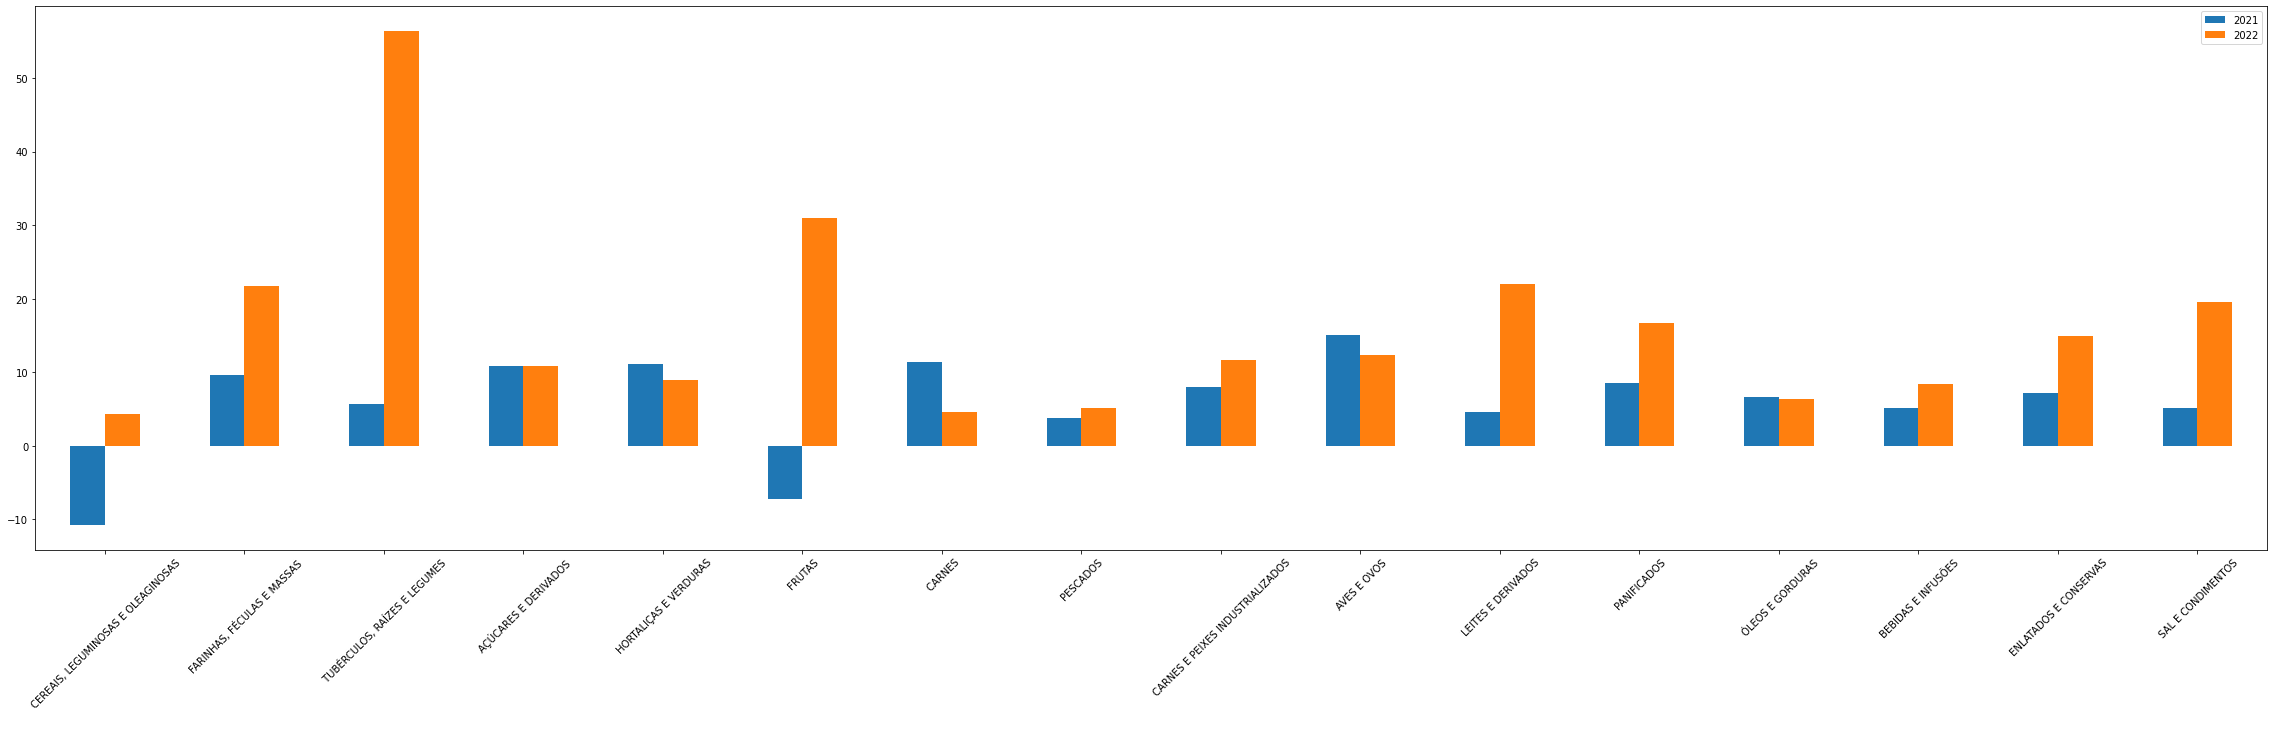

In [54]:
acumulado_anual.plot.bar(rot=45, figsize=(40,10))
#rot serve pra inclinar a fonte